In [8]:
import pandas as pd
import numpy as np 

# Function to generate synthetic star data
def generate_star_data(num_samples=1000):
    np.random.seed(42)
    spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
    data = {
        'temperature': np.random.normal(5000, 2000, num_samples),
        'luminosity': np.random.normal(1, 0.5, num_samples),
        'radius': np.random.normal(1, 0.5, num_samples),
        'metallicity': np.random.normal(0, 0.1, num_samples),
        'spectral_type': np.random.choice(spectral_types, num_samples)
    }
    df = pd.DataFrame(data)
    return df

# Generate and save star data
star_data = generate_star_data()
star_data.to_csv('synthetic_star_data.csv', index=False)
print(star_data.head())


   temperature  luminosity    radius  metallicity spectral_type
0  5993.428306    1.699678  0.662411    -0.190781             A
1  4723.471398    1.462317  0.927741    -0.086039             B
2  6295.377076    1.029815  0.603790    -0.041361             G
3  8046.059713    0.676532  0.846019     0.188769             K
4  4531.693251    1.349112  0.053193     0.055655             G


Epoch 1/10


C:\Users\hamza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4688 - loss: 0.6958 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.4942 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5244 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.4856 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5289 - loss: 0.6919 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5350 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5078 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5177 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0

C:\Users\hamza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


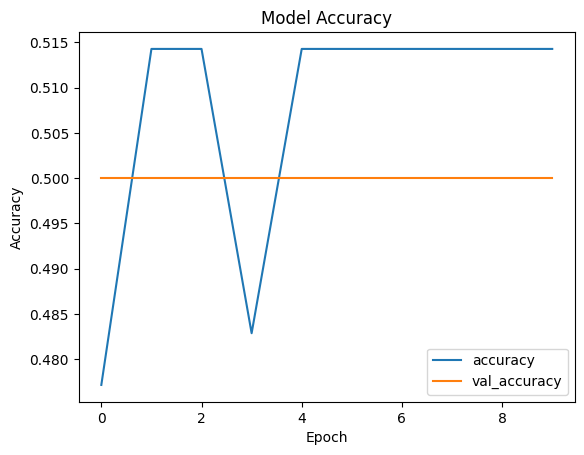

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Load the light curve data
light_curve_data = pd.read_csv('synthetic_light_curve_data.csv')

# Preprocess the light curve data
X = np.array(light_curve_data['light_curve'].apply(eval).tolist())
y = light_curve_data['label'].values

# Reshape data for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

In [10]:
import numpy as np
import pandas as pd

# Function to generate synthetic light curve data
def generate_light_curve(num_samples=1000, length=200):
    np.random.seed(42)
    data = []
    for _ in range(num_samples):
        light_curve = np.random.normal(1, 0.01, length)  # Baseline light curve with small noise
        # Randomly add a transit event
        if np.random.rand() > 0.5:
            transit_start = np.random.randint(50, 150)
            transit_depth = np.random.uniform(0.98, 0.99)
            light_curve[transit_start:transit_start+10] *= transit_depth
            label = 1
        else:
            label = 0
        data.append((light_curve.tolist(), label))
    
    df = pd.DataFrame(data, columns=['light_curve', 'label'])
    return df

# Generate and save light curve data
light_curve_data = generate_light_curve()
light_curve_data.to_csv('synthetic_light_curve_data.csv', index=False)
print(light_curve_data.head())

                                         light_curve  label
0  [1.0049671415301122, 0.9986173569882881, 1.006...      1
1  [1.004186394691726, 0.9927182075063666, 0.9819...      0
2  [0.9926038123057065, 0.9935075272166629, 0.991...      1
3  [1.0244575197961683, 1.0012922118197523, 1.001...      0
4  [1.008677650241709, 1.002830322053952, 0.98650...      1


        temperature   luminosity       radius  metallicity
count   1000.000000  1000.000000  1000.000000  1000.000000
mean    5038.664112     1.035418     1.002917    -0.001872
std     1958.431876     0.498727     0.491727     0.102713
min    -1482.534680    -0.470194    -0.509756    -0.292945
25%     3704.819389     0.696879     0.676000    -0.073742
50%     5050.601224     1.031539     0.999875     0.000018
75%     6295.887751     1.364441     1.330458     0.066695
max    12705.462981     2.596554     2.963119     0.324309


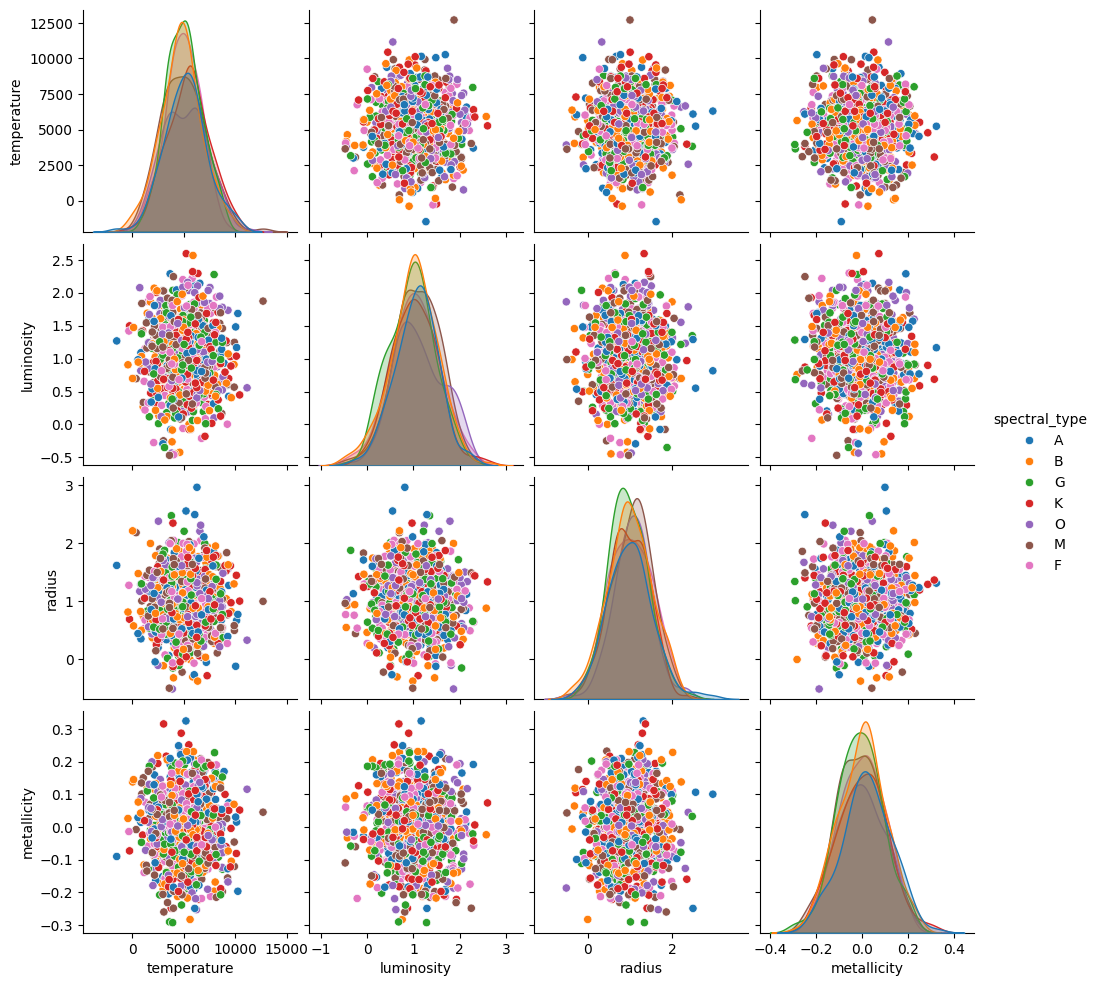

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the star classification data
star_data = pd.read_csv('synthetic_star_data.csv')

# Summary statistics
print(star_data.describe())

# Pairplot for visualizing the data
sns.pairplot(star_data, hue='spectral_type')
plt.show()

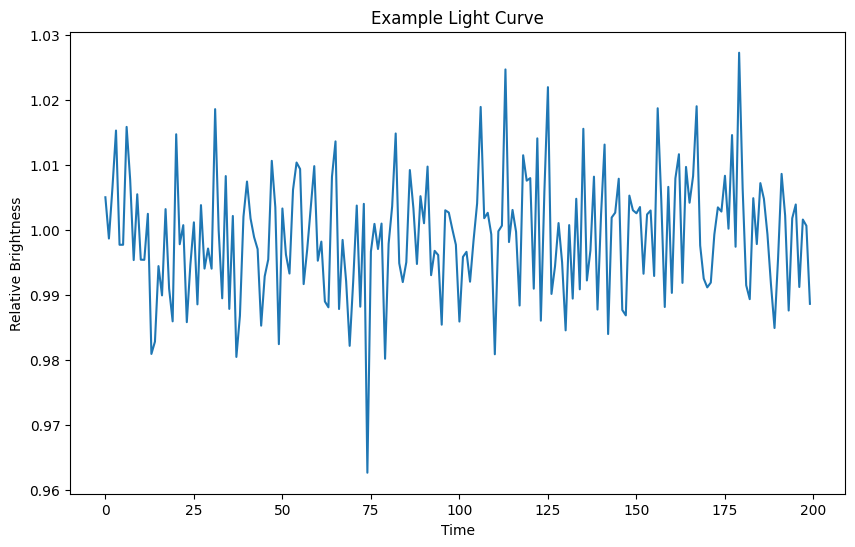

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the exoplanet detection data
light_curve_data = pd.read_csv('synthetic_light_curve_data.csv')

# Example of light curve visualization
plt.figure(figsize=(10, 6))
plt.plot(eval(light_curve_data['light_curve'][0]))
plt.title('Example Light Curve')
plt.xlabel('Time')
plt.ylabel('Relative Brightness')
plt.show()

              precision    recall  f1-score   support

           0       0.14      0.14      0.14        36
           1       0.06      0.06      0.06        52
           2       0.14      0.16      0.15        38
           3       0.11      0.15      0.13        41
           4       0.05      0.10      0.07        29
           5       0.18      0.11      0.13        56
           6       0.10      0.06      0.08        48

    accuracy                           0.11       300
   macro avg       0.11      0.11      0.11       300
weighted avg       0.12      0.11      0.11       300

[[ 5  8  6  5  4  4  4]
 [11  3  6 10  8  8  6]
 [ 3  7  6  7  5  5  5]
 [ 2 12  6  6  8  4  3]
 [ 5  6  5  5  3  1  4]
 [ 1 10  9 13 11  6  6]
 [ 8  4  4  8 16  5  3]]


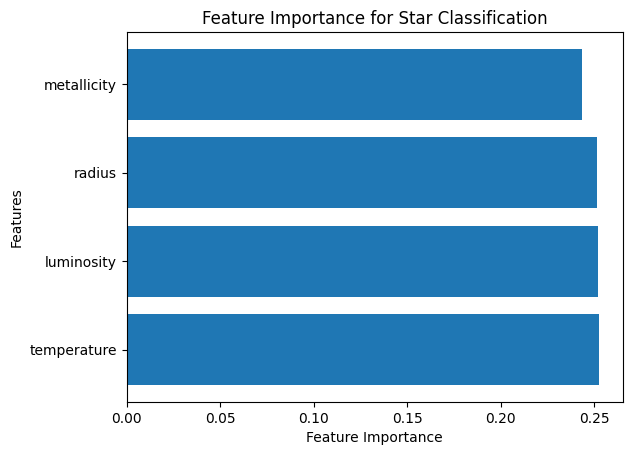

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing
le = LabelEncoder()
star_data['spectral_type'] = le.fit_transform(star_data['spectral_type'])
X = star_data.drop('spectral_type', axis=1)
y = star_data['spectral_type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Star Classification')
plt.show()

                                         light_curve  label
0  [1.0049671415301122, 0.9986173569882881, 1.006...      1
1  [1.004186394691726, 0.9927182075063666, 0.9819...      0
2  [0.9926038123057065, 0.9935075272166629, 0.991...      1
3  [1.0244575197961683, 1.0012922118197523, 1.001...      0
4  [1.008677650241709, 1.002830322053952, 0.98650...      1
Epoch 1/10


C:\Users\hamza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4994 - loss: 0.6990 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.5234 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.4586 - loss: 0.6959 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5045 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.4807 - loss: 0.6960 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5061 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5409 - loss: 0.6907 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.5342 - loss: 0.6920 - val_accuracy: 0.5000 - val_loss: 0

C:\Users\hamza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


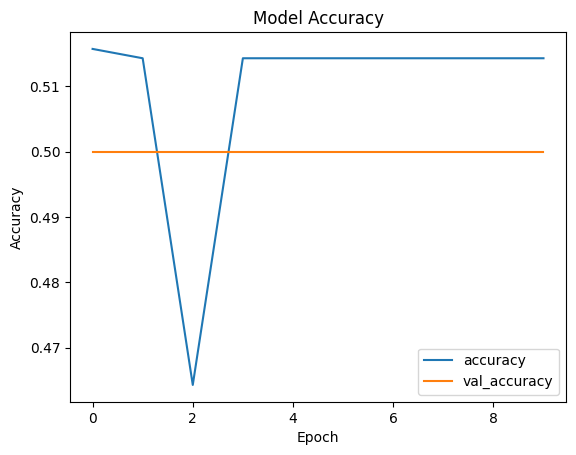

In [7]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Step 1: Generate synthetic light curve data
def generate_light_curve(num_samples=1000, length=200):
    np.random.seed(42)
    data = []
    for _ in range(num_samples):
        light_curve = np.random.normal(1, 0.01, length)  # Baseline light curve with small noise
        # Randomly add a transit event
        if np.random.rand() > 0.5:
            transit_start = np.random.randint(50, 150)
            transit_depth = np.random.uniform(0.98, 0.99)
            light_curve[transit_start:transit_start+10] *= transit_depth
            label = 1
        else:
            label = 0
        data.append((light_curve.tolist(), label))
    
    df = pd.DataFrame(data, columns=['light_curve', 'label'])
    return df

# Generate and save light curve data
light_curve_data = generate_light_curve()
light_curve_data.to_csv('synthetic_light_curve_data.csv', index=False)
print(light_curve_data.head())

# Step 2: Load and preprocess the data
light_curve_data = pd.read_csv('synthetic_light_curve_data.csv')

# Convert light curve data from string to list
X = np.array(light_curve_data['light_curve'].apply(eval).tolist())
y = light_curve_data['label'].values

# Reshape data for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 4: Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()